In [114]:
#libraries - basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as plt
import tensorflow as tf
import nltk

In [28]:
import gc

In [115]:
gc.collect()

50496

In [12]:
#pkl the test-train sets
x_train.to_pickle('x_train.pkl')
x_test.to_pickle('x_test.pkl')
y_train.to_pickle('y_train.pkl')
y_test.to_pickle('y_test.pkl')

In [113]:
#csv the test-train sets
x_train.to_pickle('x_train_features.csv')
x_test.to_pickle('x_test_features.csv')
y_train.to_pickle('y_train_features.csv')
y_test.to_pickle('y_test_features.csv')

In [3]:
#read pickled sets
x_train = pd.read_pickle('x_train.pkl')
x_test = pd.read_pickle('x_test.pkl')
y_train = pd.read_pickle('y_train.pkl')
y_test = pd.read_pickle('y_test.pkl')

In [ ]:
#trying ML models

In [30]:
#importing prebuilt metrics 
# Import modules to evaluate the metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,auc

In [31]:
import matplotlib.pyplot as plt

In [32]:
#custom metrics
# Create the confussion matrix
def plot_confussion_matrix(y_test, y_pred):
    ''' Plot the confussion matrix for the target labels and predictions '''
    cm = confusion_matrix(y_test, y_pred)

    # Create a dataframe with the confussion matrix values
    df_cm = pd.DataFrame(cm, range(cm.shape[0]),
                  range(cm.shape[1]))
    #plt.figure(figsize = (10,7))
    # Plot the confussion matrix
    sns.set(font_scale=1.4) #for label size
    sns.heatmap(df_cm, annot=True,fmt='.0f',annot_kws={"size": 10})# font size
    plt.show()
    
# ROC Curve
# plot no skill
# Calculate the points in the ROC curve
def plot_roc_curve(y_test, y_pred):
    ''' Plot the ROC curve for the target labels and predictions'''
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
    roc_auc= auc(fpr,tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

### pipelines

In [7]:
from sklearn.naive_bayes import ComplementNB

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline,Pipeline

In [53]:
df = pd.read_pickle('df_stemmed.pkl')

In [58]:
X=df['txt_clean'].values
y=df['label'].values

In [60]:
from sklearn.model_selection import train_test_split
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X,y, test_size=0.3, random_state=1)

In [ ]:
#pipeline with Naive Bayes Classifier 

In [19]:
# Transformer
tf_vec = TfidfVectorizer()
# Estimator
nv_clf = ComplementNB()

In [22]:
pipe_nv = make_pipeline(tf_vec,nv_clf)

In [61]:
# Fit the dataset
pipe_nv = pipe_nv.fit(X_train_nb,y_train_nb)

In [62]:
pipe_nv.score(X_test_nb,y_test_nb)

0.919990492874057

In [64]:
yhat = pipe_nv.predict(X_test_nb)

              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96    100450
         1.0       0.70      0.53      0.61     13149

    accuracy                           0.92    113599
   macro avg       0.82      0.75      0.78    113599
weighted avg       0.91      0.92      0.92    113599



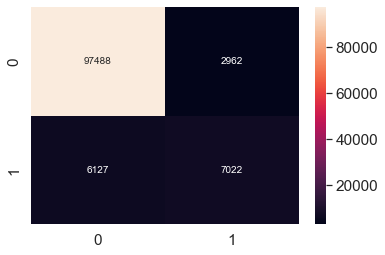

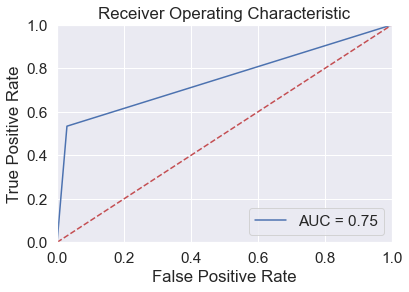

In [66]:
print(metrics.classification_report(y_test_nb, yhat))
plot_confussion_matrix(y_test_nb, yhat)
plot_roc_curve(y_test_nb, yhat)

In [67]:
#pipe with Logistic regression
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()

In [68]:
pipe_lr = make_pipeline(tf_vec,lr_clf)
pipe_lr.steps

In [71]:
pipe_lr = pipe_lr.fit(X_train_nb,y_train_nb)

C:\Users\sofnl\anaconda3\envs\gpu2\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [72]:
pipe_lr.score(X_test_nb,y_test_nb)

0.9475820751371378

In [77]:
y_pred_lr = pipe_lr.predict(X_test_nb)

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97    100450
         1.0       0.86      0.58      0.69     13149

    accuracy                           0.94    113599
   macro avg       0.90      0.78      0.83    113599
weighted avg       0.94      0.94      0.94    113599



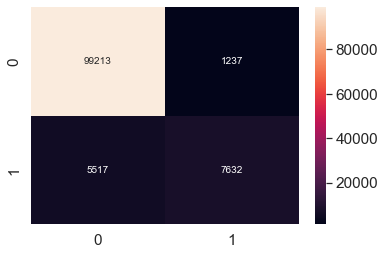

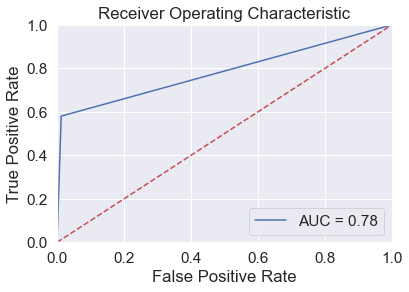

In [78]:
print(metrics.classification_report(y_test_nb, y_pred_lr))
plot_confussion_matrix(y_test_nb, y_pred_lr)
plot_roc_curve(y_test_nb, y_pred_lr)

In [83]:
lr_clf.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [87]:
#trying lr with params
params_tf = {'max_features': 3000,
 'ngram_range': (1, 2),
 'use_idf': False}
params_lr = {'penalty': None,
 'random_state': 123,
 'verbose': 2,
 'warm_start': True}

In [117]:
from sklearn.model_selection import GridSearchCV

In [119]:
# Create a Pipeline with the TfidfVectorizer and LogisticRegression model
LR_pipeline = Pipeline(steps = [('tf', TfidfVectorizer()), 
                                ('lgrg', LogisticRegression())]) # initialize TfidfVectorizer and LogisticRegression


# Create Parameter Grid
pgrid_lgrg = {
 'tf__max_features' : [1000, 2000, 3000],
 'tf__ngram_range' : [(1,1),(1,2)],
 'tf__use_idf' : [True, False],
 'lgrg__penalty' : ['l1', 'l2', 'elasticnet', 'none'],
 'lgrg__class_weight' : ['balanced', None]
}

# Apply GridSearch to Pipeline to find the best parameters
gs_lgrg = GridSearchCV(LR_pipeline, pgrid_lgrg, cv=2, n_jobs=-1, verbose=2)
gs_lgrg.fit(X_train_nb,y_train_nb) # Train LR model


Fitting 2 folds for each of 96 candidates, totalling 192 fits


C:\Users\sofnl\anaconda3\envs\gpu2\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
96 fits failed out of a total of 192.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
48 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sofnl\anaconda3\envs\gpu2\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sofnl\anaconda3\envs\gpu2\lib\site-packages\sklearn\pipeline.py", line 406, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\sofnl\anaconda3\envs\gpu2\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = 

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('tf', TfidfVectorizer()),
                                       ('lgrg', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'lgrg__class_weight': ['balanced', None],
                         'lgrg__penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'tf__max_features': [1000, 2000, 3000],
                         'tf__ngram_range': [(1, 1), (1, 2)],
                         'tf__use_idf': [True, False]},
             verbose=2)

In [120]:
gs_lgrg.best_params_

{'lgrg__class_weight': None,
 'lgrg__penalty': 'none',
 'tf__max_features': 3000,
 'tf__ngram_range': (1, 1),
 'tf__use_idf': True}

In [121]:
print('Score of train set', gs_lgrg.score(X_train_nb,y_train_nb))
print('Score of test set',gs_lgrg.score(X_test_nb,y_test_nb))

Score of train set 0.9374485969320385
Score of test set 0.9340135036399968


In [88]:
# Transformer
tf_vec2 = TfidfVectorizer(**params_tf)
lr_clf2 = LogisticRegression(**params_lr)

In [89]:
pipe_lr2 = make_pipeline(tf_vec2,lr_clf2)
pipe_lr2.steps

[('tfidfvectorizer',
  TfidfVectorizer(max_features=3000, ngram_range=(1, 2), use_idf=False)),
 ('logisticregression',
  LogisticRegression(penalty=None, random_state=123, verbose=2, warm_start=True))]

In [90]:
pipe_lr2 = pipe_lr2.fit(X_train_nb,y_train_nb)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\sofnl\anaconda3\envs\gpu2\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s finished


In [91]:
pipe_lr2.score(X_test_nb,y_test_nb)

0.932543420276587

In [92]:
y_pred_lr2=pipe_lr2.predict(X_test_nb)

              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96    100450
         1.0       0.81      0.55      0.65     13149

    accuracy                           0.93    113599
   macro avg       0.88      0.77      0.81    113599
weighted avg       0.93      0.93      0.93    113599



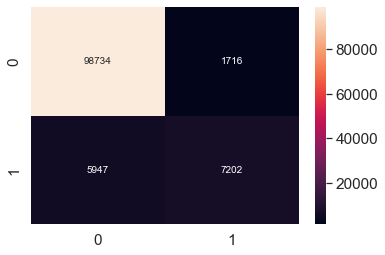

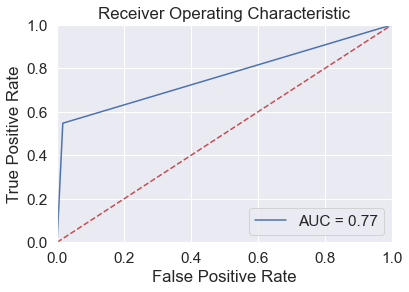

In [93]:
print(metrics.classification_report(y_test_nb, y_pred_lr2))
plot_confussion_matrix(y_test_nb, y_pred_lr2)
plot_roc_curve(y_test_nb, y_pred_lr2)

In [ ]:
#pipe with RF

In [94]:
rf = RandomForestClassifier(n_estimators=200)

In [95]:
pipe_rf = make_pipeline(tf_vec,rf)

In [96]:
pipe_rf = pipe_rf.fit(X_train_nb,y_train_nb)

KeyboardInterrupt: 

In [ ]:
pipe_rf.score(X_test_nb,y_test_nb)

In [ ]:
y_pred_rf = pipe_rf.predict(X_test_nb)

In [ ]:
print(metrics.classification_report(y_test_nb, y_pred_rf))
plot_confussion_matrix(y_test_nb, y_pred_rf)
plot_roc_curve(y_test_nb, y_pred_rf)

In [45]:
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [100]:
rs_space={'max_depth':list(np.arange(5, 20, step=5)) + [None],
              'n_estimators':[200],
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [101]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(rf, rs_space, n_iter=20, scoring='f1', n_jobs=-1, cv=3)

In [102]:
model_random = rf_random.fit(x_train, y_train)

MemoryError: Unable to allocate 6.82 GiB for an array with shape (20001, 45788) and data type int64

In [103]:
# create the model, train it, print scores
clf = RandomForestClassifier(n_estimators=200, criterion='entropy', max_depth=5, random_state=123, warm_start=True)
clf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=200,
                       random_state=123, warm_start=True)

In [104]:
print("train score:", clf.score(x_train, y_train))
print("test score:", clf.score(x_test, y_test))

train score: 0.7502111179057104
test score: 0.8202880826199211


In [105]:
# Predicting the Test set results
y_pred = clf.predict(x_test)

C:\Users\sofnl\anaconda3\envs\gpu2\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sofnl\anaconda3\envs\gpu2\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sofnl\anaconda3\envs\gpu2\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.82      1.00      0.90     24146
           1       0.00      0.00      0.00      5290

    accuracy                           0.82     29436
   macro avg       0.41      0.50      0.45     29436
weighted avg       0.67      0.82      0.74     29436



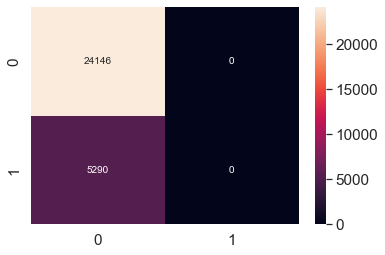

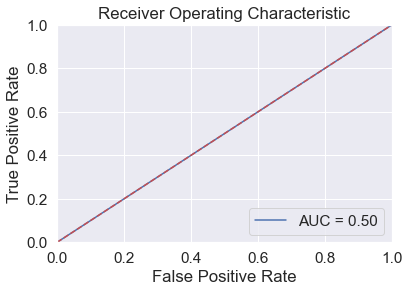

In [106]:
print(metrics.classification_report(y_test, y_pred))
plot_confussion_matrix(y_test, y_pred)
plot_roc_curve(y_test, y_pred)

### RandomForestClassifier with 300 estimators

In [8]:
# create the model, train it, print scores
clf = RandomForestClassifier(n_estimators=300)
clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=300)

In [9]:
print("train score:", clf.score(x_train, y_train))
print("test score:", clf.score(x_test, y_test))

train score: 0.8820214903468158
test score: 0.8295284685419214


In [10]:
# Predicting the Test set results
y_pred = clf.predict(x_test)

              precision    recall  f1-score   support

           0       0.85      0.96      0.90     24146
           1       0.56      0.23      0.33      5290

    accuracy                           0.83     29436
   macro avg       0.71      0.60      0.61     29436
weighted avg       0.80      0.83      0.80     29436



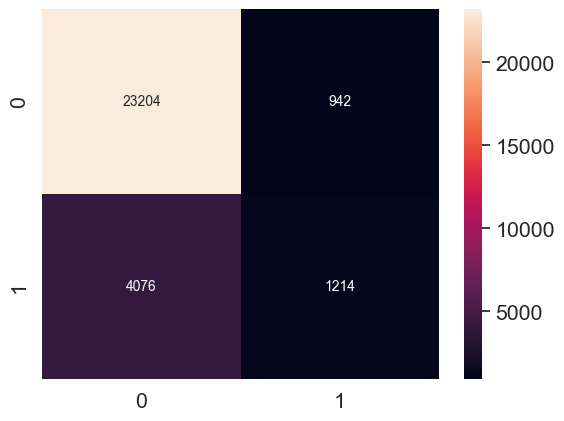

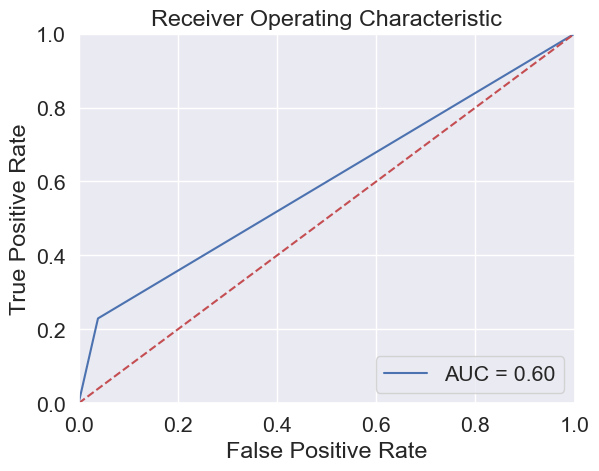

In [11]:
print(metrics.classification_report(y_test, y_pred))
plot_confussion_matrix(y_test, y_pred)
plot_roc_curve(y_test, y_pred)

### XGBoost

In [33]:
##XGBoost! Which is the best for sparse data
from lightgbm import LGBMClassifier
#f1 is balancing the recall and precision on positives
from sklearn.metrics import f1_score

In [41]:
def f1_metric(ytrue,preds):
    ''' Return the F1 Score value for the preds and true values, ytrue '''
    return 'f1_score', f1_score((preds>=0.5).astype('int'), ytrue, average='macro'), True

params = {
    'learning_rate': 0.5, #0.01, 0.3
    'n_estimators': 1500,
    'colsample_bytree': 0.5,
    'max_depth' : 7, #10, -1
    'metric': 'f1_score',
    'early_stopping_round':5
}

full_clf = LGBMClassifier(**params, boosting_type='goss')

In [42]:
# Fit or train the xgboost model
full_clf.fit(x_train, y_train, eval_set=[(x_train, y_train), (x_test, y_test)],
             eval_metric=f1_metric)

[1]	training's f1_score: 0.462424	valid_1's f1_score: 0.489834
[2]	training's f1_score: 0.504108	valid_1's f1_score: 0.512994
[3]	training's f1_score: 0.530152	valid_1's f1_score: 0.528439
[4]	training's f1_score: 0.532842	valid_1's f1_score: 0.530842
[5]	training's f1_score: 0.552176	valid_1's f1_score: 0.543236
[6]	training's f1_score: 0.555986	valid_1's f1_score: 0.54908
[7]	training's f1_score: 0.55919	valid_1's f1_score: 0.552656
[8]	training's f1_score: 0.561329	valid_1's f1_score: 0.554947
[9]	training's f1_score: 0.563691	valid_1's f1_score: 0.558286
[10]	training's f1_score: 0.56719	valid_1's f1_score: 0.560904
[11]	training's f1_score: 0.569886	valid_1's f1_score: 0.562836
[12]	training's f1_score: 0.574749	valid_1's f1_score: 0.566735
[13]	training's f1_score: 0.574818	valid_1's f1_score: 0.566523
[14]	training's f1_score: 0.577066	valid_1's f1_score: 0.567265
[15]	training's f1_score: 0.577054	valid_1's f1_score: 0.566735
[16]	training's f1_score: 0.578262	valid_1's f1_scor

LGBMClassifier(boosting_type='goss', colsample_bytree=0.5,
               early_stopping_round=5, learning_rate=0.5, max_depth=7,
               metric='f1_score', n_estimators=1500)

In [43]:
#Show the results
print("train score:", full_clf.score(x_train, y_train))
print("test score:", full_clf.score(x_test, y_test))

train score: 0.786901953932617
test score: 0.8325180051637451


In [11]:
# Predicting the Test set results
y_pred = full_clf.predict(x_test)

              precision    recall  f1-score   support

           0       0.85      0.97      0.91     24146
           1       0.62      0.20      0.30      5290

    accuracy                           0.83     29436
   macro avg       0.73      0.59      0.60     29436
weighted avg       0.81      0.83      0.80     29436



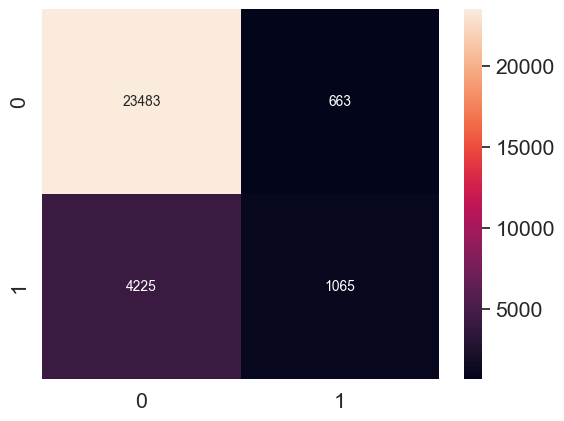

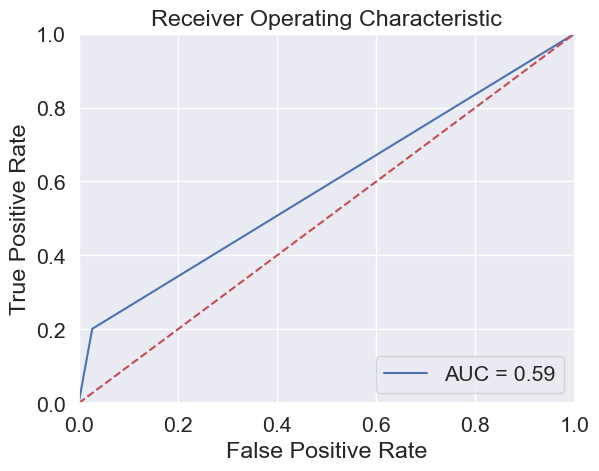

In [14]:
print(metrics.classification_report(y_test, y_pred))
plot_confussion_matrix(y_test, y_pred)
plot_roc_curve(y_test, y_pred)

In [ ]:
#finetuning with random search
N_FOLDS = 5
MAX_EVALS = 5

In [ ]:
# Hyperparameter grid
param_grid = {
    'boosting_type': ['gbdt', 'goss', 'dart'],
    'num_leaves': list(range(20, 150)),
    'learning_rate': list(np.logspace(np.log10(0.005), np.log10(0.5), base = 10, num = 1000)),
    'subsample_for_bin': list(range(20000, 300000, 20000)),
    'min_child_samples': list(range(20, 500, 5)),
    'reg_alpha': list(np.linspace(0, 1)),
    'reg_lambda': list(np.linspace(0, 1)),
    'colsample_bytree': list(np.linspace(0.6, 1, 10)),
    'subsample': list(np.linspace(0.5, 1, 100)),
    'is_unbalance': [True, False]
}